In [76]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold, LeaveOneOut, cross_val_score, LeavePOut, cross_validate
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression
from sklearn.svm import SVR

import seaborn as sns

In [77]:
iris = load_iris()
X=iris.data
y=iris.target

In [78]:
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [79]:
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
name_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2:'Iris-virginica'}
iris_data['class'] = [name_map[k] for k in iris['target']]
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

In [81]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8260869565217391
0.7999999999999999


<Axes: >

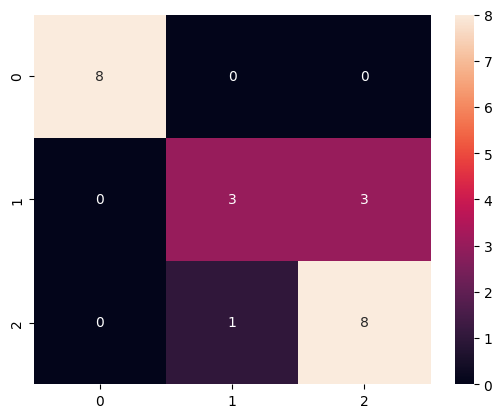

In [82]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

1.0
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

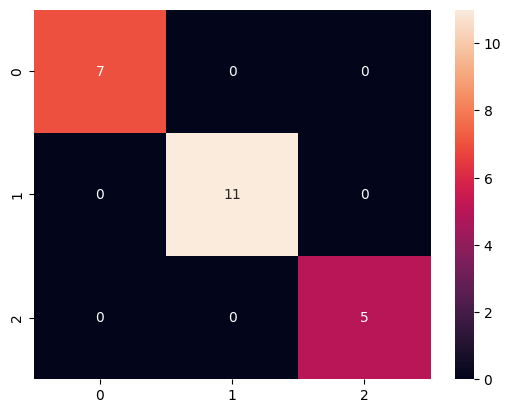

In [84]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8695652173913043
0.8745098039215686


<Axes: >

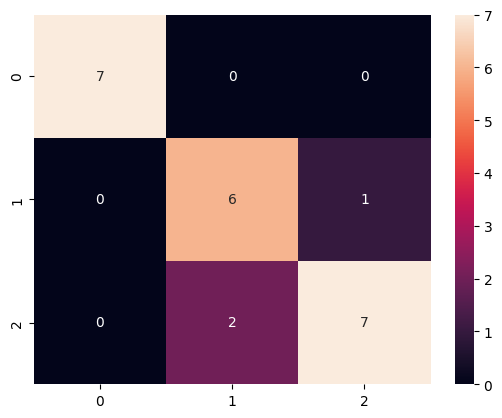

In [86]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [87]:
kf = KFold(n_splits = 3,shuffle=True, random_state=15)
kf

KFold(n_splits=3, random_state=15, shuffle=True)

In [88]:
for i, (train_index, test_index) in enumerate(kf.split(y)):
    print("Fold {}: Длинна train: {}, Длинна test: {}".format(i+1, len(train_index), len(test_index)))
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1: Длинна train: 100, Длинна test: 50
Train: index=[  1   2   3   4   7  10  14  15  16  17  18  19  22  23  24  26  28  29
  32  33  34  35  37  38  39  40  41  42  43  44  45  46  49  50  51  52
  53  54  56  60  62  63  64  65  66  68  69  70  73  75  76  77  79  80
  81  82  83  85  87  88  91  92  93  94  96  99 101 102 104 105 106 107
 108 110 111 113 114 117 118 119 120 121 123 125 128 131 132 133 134 135
 136 137 139 140 141 142 144 145 146 147]
 Test:  index=[  0   5   6   8   9  11  12  13  20  21  25  27  30  31  36  47  48  55
  57  58  59  61  67  71  72  74  78  84  86  89  90  95  97  98 100 103
 109 112 115 116 122 124 126 127 129 130 138 143 148 149]
Fold 2: Длинна train: 100, Длинна test: 50
Train: index=[  0   1   4   5   6   7   8   9  10  11  12  13  15  17  19  20  21  22
  23  24  25  26  27  28  30  31  34  36  37  39  40  41  42  44  47  48
  50  53  55  56  57  58  59  60  61  62  63  65  66  67  70  71  72  74
  75  78  79  84  85  86  89  90  95  96  97

In [89]:
metrics_accuracy = []
metrics_f1 = []
model = LogisticRegression(solver='liblinear')
for i, (train_index, test_index) in enumerate(kf.split(y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_accuracy.append(accuracy_score(y_test, y_pred))
    metrics_f1.append(f1_score(y_test, y_pred, average='macro'))

In [90]:
print('Значения метрики accuracy: {} \nЗначения метрики f1: {}'.format(metrics_accuracy, metrics_f1))

Значения метрики accuracy: [0.96, 0.96, 0.9] 
Значения метрики f1: [0.9595588235294118, 0.9629629629629629, 0.890652557319224]


In [91]:
print("Среднее по кросс-валидации: ", np.array(metrics_f1).mean())

Среднее по кросс-валидации:  0.9377247812705329


In [92]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = kf,                # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'accuracy',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [0.96 0.96 0.9 ]
Среднее по кросс-валидации:  0.94
Дисперсия по кросс-валидации:  0.028284271247461874


In [93]:
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=15)
skf.get_n_splits(X, y)

3

In [94]:
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  0   1   2   3   4   5   7   8   9  12  14  15  16  17  18  19  21  23
  24  25  26  28  29  31  32  36  37  38  39  40  41  44  45  51  52  53
  54  55  60  61  62  63  65  66  68  70  72  75  77  80  81  82  83  84
  85  86  87  89  90  91  93  94  95  96  97  98 101 102 103 104 105 107
 110 111 112 113 114 116 118 121 122 123 124 126 127 128 129 132 133 134
 139 140 141 142 143 144 145 146 147 149]
 Test:  index=[  6  10  11  13  20  22  27  30  33  34  35  42  43  46  47  48  49  50
  56  57  58  59  64  67  69  71  73  74  76  78  79  88  92  99 100 106
 108 109 115 117 119 120 125 130 131 135 136 137 138 148]
Fold 2:
Train: index=[  0   1   2   4   5   6   9  10  11  13  14  15  16  19  20  21  22  23
  26  27  28  29  30  31  33  34  35  42  43  46  47  48  49  50  51  54
  55  56  57  58  59  61  63  64  66  67  69  70  71  73  74  75  76  78
  79  83  84  87  88  89  90  91  92  94  96  97  99 100 101 103 105 106
 107 108 109 110 114 115 116 117 118 119 

In [95]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = skf,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1.         1.         0.92046784]
Среднее по кросс-валидации:  0.9734892787524366


In [96]:
loo = LeaveOneOut()

In [97]:
for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]
 Test:  index=[0]
Fold 2:
Train: index=[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  

In [98]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = loo,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Среднее по кросс-валидации:  0.9533333333333334


1. Изучите разбиение Leave-P-Out. Продемонстрируйте работу этого алгоритма на примере из лабораторной работы.

In [99]:
lpo = LeavePOut(2)

In [100]:
for i, (train_index, test_index) in enumerate(lpo.split(X)):
    print(f"Fold {i + 1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Выходные данные были обрезаны до нескольких последних строк (5000).
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 120 121 122 123 124 125 126
 127 128 129 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149]
 Test:  index=[119 130]
Fold 10722:
Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 120 121 122 123 124 125 126
 127 128 129 130 132 133 134 135 136 137 138 139 140 141 142 1

In [101]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = lpo,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1. 1. 1. ... 1. 1. 1.]
Среднее по кросс-валидации:  0.9405219985085758


2. Изучите функцию cross_validate(). Продемонстрируйте работу этой функции на тех же данных.

In [102]:
cv_results = cross_validate(model, X, y, cv= 3) #  Одна метрика
cv_results["test_score"]

array([0.96, 0.96, 0.94])

In [103]:
scores = cross_validate(model, X, y, cv= 3, scoring=("accuracy", "r2"), return_train_score= True) #  Несколько метрик
print(scores["test_accuracy"])
print(scores["test_r2"])

[0.96 0.96 0.94]
[0.93935719 0.94117647 0.90903578]


3. Оцените при помощи кросс-валидации другие метрики эффективности для этой же модели.

In [104]:
scores = cross_validate(model, X, y, cv= 3, scoring=("accuracy", "r2", "balanced_accuracy", "neg_mean_squared_error"), return_train_score= True) #  Несколько метрик
print(scores["test_accuracy"])
print(scores["test_r2"])
print(scores["test_balanced_accuracy"])
print(scores["test_neg_mean_squared_error"])

[0.96 0.96 0.94]
[0.93935719 0.94117647 0.90903578]
[0.96078431 0.95955882 0.94117647]
[-0.04 -0.04 -0.06]


4. Сравните кросс-валидированные результаты работы нескольких моделей на одних и тех же данных.

In [105]:
model1 = LogisticRegression().fit(X_train, y_train)
model2 = LogisticRegression(solver= "liblinear").fit(X_train, y_train)
model3 = LogisticRegression(solver= "newton-cg").fit(X_train, y_train)
lst = [model1, model2, model3]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
for i in lst:
  cv_results = cross_validate(i, X, y, cv= 3)
  print(f"Accuracy {i}: {cv_results['test_score']}")

Accuracy LogisticRegression(): [0.98 0.96 0.98]
Accuracy LogisticRegression(solver='liblinear'): [0.96 0.96 0.94]
Accuracy LogisticRegression(solver='newton-cg'): [0.98 0.96 0.98]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5. Повторите анализ на другом датасете: встроенном наборе данных о диабете.

In [107]:
data = load_diabetes()

In [108]:
X = data.data
y = data.target

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8)

In [110]:
for i, (train_index, test_index) in enumerate(kf.split(y)):
    print("Fold {}: Длинна train: {}, Длинна test: {}".format(i+1, len(train_index), len(test_index)))
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1: Длинна train: 294, Длинна test: 148
Train: index=[  0   1   3   5   7   8  10  11  14  15  16  17  19  20  22  23  26  27
  28  29  30  31  32  34  36  37  39  41  42  43  45  46  48  49  50  51
  53  56  57  59  61  62  63  66  68  70  71  72  74  75  76  78  81  82
  84  85  87  88  90  91  92  93  94  96  98  99 100 101 102 104 107 108
 112 113 114 117 118 119 120 121 122 123 128 130 132 133 134 136 137 140
 141 143 144 145 147 150 151 152 153 154 155 156 157 159 160 161 162 163
 164 165 166 168 169 171 172 173 174 176 177 179 180 181 182 183 184 185
 186 187 188 189 195 196 197 198 199 201 202 203 205 206 207 208 209 211
 212 213 215 217 218 219 221 222 223 224 225 226 227 229 230 231 232 234
 236 237 240 242 243 244 245 246 248 249 252 253 256 259 260 262 263 264
 266 269 270 271 272 273 274 277 279 280 281 282 283 284 289 290 291 293
 295 296 300 302 306 309 310 312 313 315 316 317 318 323 325 326 327 329
 330 331 332 335 336 337 339 340 343 344 346 348 349 350 351 352 35

In [111]:
metrics_r2 = []
metrics_mse = []
model = LinearRegression()
for i, (train_index, test_index) in enumerate(kf.split(y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_r2.append(r2_score(y_test, y_pred))
    metrics_mse.append(mean_squared_error(y_test, y_pred))

In [112]:
print('Значения метрики r2: {} \nЗначения метрики mse: {}'.format(metrics_r2, metrics_mse))

Значения метрики r2: [0.4803540589152355, 0.4872931335735652, 0.4768989146624787] 
Значения метрики mse: [2905.3010513863214, 3167.125911108999, 3143.5248580805846]


In [113]:
print("Среднее по кросс-валидации: ", np.array(metrics_r2).mean())

Среднее по кросс-валидации:  0.4815153690504264


In [114]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = kf,                # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'r2',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [0.48035406 0.48729313 0.47689891]
Среднее по кросс-валидации:  0.4815153690504264
Дисперсия по кросс-валидации:  0.004322146659201492


In [115]:
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  0   1   3   4   5   6   8   9  11  14  15  17  20  22  24  25  26  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  49  51  55  56  57  58  59  60  61  62  64  65  66  68  69  70  72
  73  74  75  78  79  80  81  84  85  86  87  88  91  95  96  97  99 100
 104 105 106 107 108 110 112 114 115 116 118 119 121 122 123 125 127 129
 130 132 135 136 137 138 139 140 142 146 147 148 149 151 154 156 159 160
 163 165 166 167 169 171 172 173 174 175 176 178 180 181 182 183 184 185
 187 188 190 191 192 194 196 198 199 200 201 203 204 205 206 207 208 209
 210 211 212 213 214 216 217 218 219 220 224 225 228 231 232 234 235 236
 238 241 242 243 244 247 248 249 250 252 254 255 257 258 260 261 262 263
 264 267 268 272 273 274 275 276 277 278 279 282 283 286 287 290 292 293
 295 296 297 298 299 300 302 304 306 307 310 313 314 315 316 318 320 322
 323 324 327 328 329 330 331 332 333 334 335 337 338 339 340 341 343 344
 346 347 348 349 350 352 355 3

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [116]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = skf,           # тип разбиения
                             scoring = 'r2',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [0.55576939 0.3388926  0.49383927]
Среднее по кросс-валидации:  0.4628337527525974


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [117]:
for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Выходные данные были обрезаны до нескольких последних строк (5000).
 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396
 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414
 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432
 433 434 435 436 437 438 439 440 441]
 Test:  index=[256]
Fold 258:
Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155

In [118]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = loo,           # тип разбиения
                             scoring = 'r2',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan 